# Laboratorio No. 1 de Automatas.

Librerias a utilizar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split as tts

Funciones para cargar el data set

In [2]:
def convert_dataset_from_xlsx_to_csv(ruta_xlsx, ruta):
    _dataset_xlsx = pd.read_excel(ruta_xlsx)
    _dataset_xlsx.to_csv(ruta, encoding='utf-8')
    print('[OK]    From xlsx to csv.')
    
def get_dataset(ruta):
    dataset = pd.read_csv(ruta, encoding='utf-8')
    return dataset.replace(np.nan, '0')


def data_to_norm(dataframe):
    for dims in dataframe:
        if dims == 'Cost':
            break
        else:
            value_max = dataframe[dims].max()
            value_min = dataframe[dims].min()
            #print('{}>> Valor max: {}, Valor min: {}'.format(dims, value_max, value_min) )
            dataframe[dims] = (dataframe[dims] - value_min)/(value_max - value_min)
    return dataframe

def get_characteristic(dataframe):
    _trainig_data = dataframe.shape[0] * dataframe.shape[1]
    x_features = dataframe[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT' ]].dropna(axis=0, how='any')
    y_labels = dataframe[['Cost']].dropna(axis=0, how='any')
    return x_features,  y_labels

Funcones para crear el modelo y Entrenarolo


In [3]:
def get_hiperparameters(x_features_training):
    _learning_rate = 0.52
    _num_epochs = 1000
    _display_step = 100
    _rows = np.shape(x_features_training)[0]
    _columns = np.shape(x_features_training)[1]
    return _learning_rate, _num_epochs, _display_step, _rows, _columns

def get_placeholders(rows, columns):
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, [rows, columns])
    Y = tf.placeholder(tf.float32, [rows, 1])
    return X, Y

def get_variables(columns):
    theta = tf.get_variable("theta",[columns, 1])
    theta_cero = tf.get_variable("theta0",[1])
    return theta, theta_cero

def _h_func(X_features_ph, theta, theta_cero):
    hipotesis = tf.add(tf.matmul(X_features_ph, theta), theta_cero)
    print('[OK]    Hipotesis.')
    return hipotesis

def _J_func(y_labels_training, X_features_ph, theta, theta_cero):
    J = tf.pow(_h_func(X_features_ph, theta, theta_cero) - y_labels_training,2)
    print('[OK]    Loss Function.')
    return J

def get_mean_j(rows, y_labels_training, X_features_ph, theta, theta_cero):
    mean_J = (1/(2*rows))*tf.reduce_sum(_J_func(y_labels_training, X_features_ph, theta, theta_cero))
    print('[OK]    Mean of Loss Function.')
    return mean_J
    
    
def tftGDO(learning_rate, mean_J):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(mean_J)
    print('[OK]    Gradient Descent Optimizer.')
    return optimizer

Funciones para Graficacion

In [4]:
def grafics(labelx, labely):
    for dims in labelx:
        if plt.scatter(labelx[dims], labely):
            print('[OK]    Grafics from {}.'.format(dims))
        else:
            print('[FAIL]  Grafics from {}.'.format(dims))

def grafics_with_plot(ep,train_cost):
    plt.plot(ep,train_cost)
    plt.show()

Funciones para Test del modelo

## Main():

[OK]    From xlsx to csv.
[OK]    Normalización del dataframe

[OK]    Grafics from CRIM.
[OK]    Grafics from ZN.
[OK]    Grafics from INDUS.
[OK]    Grafics from CHAS.
[OK]    Grafics from NOX.
[OK]    Grafics from RM.
[OK]    Grafics from AGE.
[OK]    Grafics from DIS.
[OK]    Grafics from RAD.
[OK]    Grafics from TAX.
[OK]    Grafics from PTRATIO.
[OK]    Grafics from B.
[OK]    Grafics from LSTAT.


W0908 18:27:33.244283  8584 deprecation.py:506] From C:\Users\joseo\Anaconda3\envs\automatas\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0908 18:27:33.338017  8584 deprecation.py:323] From C:\Users\joseo\Anaconda3\envs\automatas\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[OK]    Hipotesis.
[OK]    Loss Function.
[OK]    Mean of Loss Function.
[OK]    Gradient Descent Optimizer.

	Start Trainig...

Epoch: 100 train_cost=11.6688
Epoch: 200 train_cost=10.7218
Epoch: 300 train_cost=10.4817
Epoch: 400 train_cost=10.3646
Epoch: 500 train_cost=10.2968
Epoch: 600 train_cost=10.2548
Epoch: 700 train_cost=10.2278
Epoch: 800 train_cost=10.2100
Epoch: 900 train_cost=10.1980
Epoch: 1000 train_cost=10.1898
Entrenamiento Finalizado


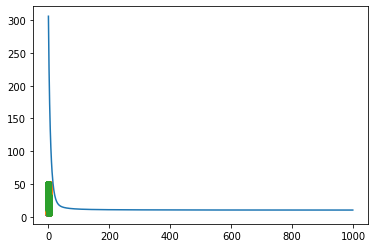

In [5]:
def main(dataframe):
    #print(dataframe)
    x_features, y_labels = get_characteristic(dataframe)
    grafics(x_features, y_labels)                            #Grafico las trece caracteristicas
    
    # Separo entre datos de entrenamiento y datos de test
    x_features_training, x_features_test, y_labels_training, y_labels_test = tts(x_features, y_labels, test_size=0.2)
    learning_rate, num_epochs, display_step, rows, columns = get_hiperparameters(x_features_training)
    
    #Creo mis placeholders para las features y caracteristica y mi variables.
    X_features_ph, Y_labels_ph = get_placeholders(rows, columns)
    theta, theta_cero = get_variables(columns)
    
    # Obtengo la media de mi funcion de costo 
    y_labels_training_tmp = tf.cast(y_labels_training, tf.float32)   #Recuerda que se te presento el error de floar64 proveniente del MatMul
    mean_J = get_mean_j(rows, y_labels_training_tmp, X_features_ph, theta, theta_cero)
    
    # Optimizer
    optimizer = tftGDO(learning_rate, mean_J)
    
    print('\n\tStart Trainig...\r\n')
    train_cost = []
    ep = []
    with tf.name_scope("starting_tensorflow_session"):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for epoch in range(num_epochs):
                _, t_cost = sess.run([optimizer, mean_J], feed_dict={X_features_ph: x_features_training, Y_labels_ph: y_labels_training})
                train_cost.append(t_cost)
                ep.append(epoch)
                if (epoch+1) % display_step == 0:
                    print("Epoch: {}".format(epoch + 1), "train_cost={:0.4f}".format(t_cost))
            print('Entrenamiento Finalizado')
            th = sess.run(theta)
            th0 = sess.run(theta_cero)
    grafics_with_plot(ep,train_cost)

    
if __name__=='__main__':
    ruta_xlsx = '~/Documents/2019-2/Automatas/modelos/machine/lab_uno/dataset/boston.xlsx'
    ruta = 'dataset/boston.csv'
    convert_dataset_from_xlsx_to_csv(ruta_xlsx, ruta)
    dataset = get_dataset(ruta)
    #Creamos el dataframe
    dataframe = data_to_norm(pd.DataFrame(dataset))   # Primero se convierte a un dataframe de pandas>> dataframe = pd.DataFrame(dataset)
    print('[OK]    Normalización del dataframe\r\n')
    main(dataframe)